### Exercise 1: Planetary Orbits

##### (i)

$$
\begin{aligned}
\alpha &= \frac{dx}{dt}\\
\frac{d\alpha}{dt} &= \frac{d^2\alpha}{dt^2}
\end{aligned}
$$

$$
\begin{aligned}
\beta &= \frac{dy}{dt}\\
\frac{d\beta}{dt} &= \frac{d^2\beta}{dt^2}
\end{aligned}
$$


Substitute and obtain:

$$
\begin{aligned}
\frac{dx}{dt} &= \alpha\\
\frac{d\alpha}{dt} &= -\frac{GMx}{r^3}
\end{aligned}
$$ 

$$
\begin{aligned}
\frac{dy}{dt} &= \beta\\
\frac{d\beta}{dt} &= -\frac{GMy}{r^3}
\end{aligned}
$$ 

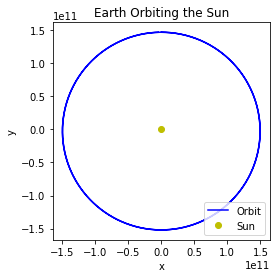

In [1]:
#(ii)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(r,alphasqr, betasqr):
    alpha = r[0]
    x = r[1]        #unpack the array r into local variables
    beta = r[2]
    y = r[3]
    a = ((x**2) + (y**2))**0.5
    #calculate the derivatives 
    dx = alpha
    dalpha = -alphasqr * (x / (a**3))
    dy = beta
    dbeta = -betasqr * (y / (a**3))
    return np.array([dalpha,dx, dbeta, dy],float)  #first element is x derivative
                                            #second is the alpha derivative

start = 0.0
end = 63e6
numSteps = 1000
stepSize = (end-start)/numSteps

# physical and system constants
G = 6.6738e-11 #Gravitational Constant 
M = 1.9891e30 #Mass of the Sun
alphasqr = G * M
betasqr = G * M

peri = 1.4710e11 #perihelion distance 
v = 3.0287e4 #perihelion velocity

tpoints = np.arange(start,end,stepSize)
alphapts = []
xpts = []
betapts = []
ypts = []

# initial conditions for alpha, x, beta, and y; summarized in vector r
r = np.array([v,0, 0, peri], float)   

# all steps are as normal RK4, but vector valued quantities used
for t in tpoints:
    alphapts.append(r[0])
    xpts.append(r[1])
    betapts.append(r[2])
    ypts.append(r[3])

    k1 = stepSize*f(r,alphasqr,betasqr)
    k2 = stepSize*f(r+0.5*k1,alphasqr, betasqr)
    k3 = stepSize*f(r+0.5*k2,alphasqr, betasqr)
    k4 = stepSize*f(r+k3,alphasqr, betasqr)
    r += (k1+2.*k2+2.*k3+k4)/6
    
# plot results

plt.plot(xpts, ypts, 'b-', label = 'Orbit')
plt.plot(0, 0, 'yo', label = 'Sun')
plt.title("Earth Orbiting the Sun")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.gca().set_aspect('equal', adjustable = 'box')
plt.show()

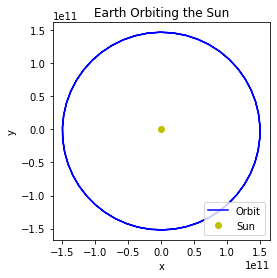

In [2]:
#(iii)

import numpy as np
from scipy.integrate import odeint, solve_ivp
%matplotlib inline
import matplotlib.pyplot as plt


def f(r, t, alphasqr, betasqr):
    alpha=r[0]
    x=r[1]
    dx = alpha
    beta = r[2]
    y = r[3]
    dy = beta
    a = (x**2 + y**2)**0.5
    dalpha = -alphasqr*(x / a**3)
    dbeta = -betasqr*(y / a**3)
    return np.array([dalpha,dx,dbeta,dy],float)


peri = 1.4710e11 #perihelion distance 
v = 3.0287e4 #perihelion velocity


# initial condition as vector
initial = [v, 0, 0, peri]

# time interval
start = 0.0
end = 63e6
tvec = np.linspace(start, end, 101)

# constants
G = 6.6738e-11 #Gravitational Constant 
M = 1.9891e30 #Mass of the Sun
alphasqr = G * M
betasqr = G * M

sol = odeint(f, initial, tvec, args = (alphasqr, betasqr,))

plt.plot(sol[:, 1], sol[:, 3], 'b-', label='Orbit')
plt.plot(0, 0, 'yo', label = 'Sun')
plt.title("Earth Orbiting the Sun")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.gca().set_aspect('equal', adjustable = 'box')
plt.show()

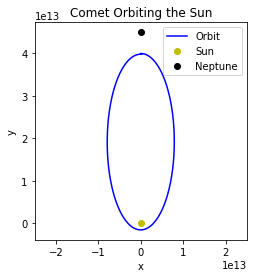

In [3]:
#(iv)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f(r,alphasqr, betasqr):
    alpha = r[0]
    x = r[1]        #unpack the array r into local variables
    beta = r[2]
    y = r[3]
    a = ((x**2) + (y**2))**0.5
    #calculate the derivatives 
    dx = alpha
    dalpha = -alphasqr * (x / (a**3))
    dy = beta
    dbeta = -betasqr * (y / (a**3))
    return np.array([dalpha,dx, dbeta, dy],float)  #first element is x derivative
                                            #second is the alpha derivative

start = 0.0
end = 52e9
numSteps = 1000
stepSize = (end-start)/numSteps

# physical and system constants
G = 6.6738e-11 #Gravitational Constant 
M = 1.9891e30 #Mass of the Sun
alphasqr = G * M
betasqr = G * M

ap = 4e13 #aphelion distance 
v = 500 #aphelion velocity

tpoints = np.arange(start,end,stepSize)
alphapts = []
xpts = []
betapts = []
ypts = []

# initial conditions for alpha, x, beta, and y; summarized in vector r
r = np.array([v,0, 0, ap], float)   

# all steps are as normal RK4, but vector valued quantities used
for t in tpoints:
    alphapts.append(r[0])
    xpts.append(r[1])
    betapts.append(r[2])
    ypts.append(r[3])

    k1 = stepSize*f(r,alphasqr,betasqr)
    k2 = stepSize*f(r+0.5*k1,alphasqr, betasqr)
    k3 = stepSize*f(r+0.5*k2,alphasqr, betasqr)
    k4 = stepSize*f(r+k3,alphasqr, betasqr)
    r += (k1+2.*k2+2.*k3+k4)/6
    
# plot results

plt.plot(xpts, ypts, 'b-', label = 'Orbit')
plt.plot(0, 0, 'yo', label = 'Sun')
plt.plot(0, 4.5e13, 'ko', label = 'Neptune')
plt.title("Comet Orbiting the Sun")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-25e12, 25e12)
plt.legend(loc='best')
plt.gca().set_aspect('equal', adjustable = 'box')
plt.show()

### Exercise 2: Quantum Oscillators

In [ ]:
import numpy as np
%matplotlib inline
# import physical constants from SciPy
from scipy.constants import hbar, m_e, e
import matplotlib.pyplot as plt
a = 1e-11
V_0 = 50 #eV

h_init = -5 * a
h_fin = 5 * a
# numerical parameters
numSteps = 1000
stepSize = (h_fin - h_init/numSteps)

# Potential function => trivial in this example
# (but we can easily generalize the problem by replacing this by a complicated potential!)
def V(x):
    return (V_0 * (x**4)) / (a)**4

# Schroedinger equation
def f(R,x,E):
    psi = R[0]
    phi = R[1]    # this is what we will call the derivative of psi
    fpsi = phi    # we turned the second order equation into two first order equations, as usual
    fphi = (2*m_e/hbar**2)*(V(x)-E)*psi
    return np.array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy with RK4
def solve(E):
    psi = 0.0
    phi = 1.0     # the initial condition for phi doesn't matter => only affects normalization
    R = np.array([psi,phi],float)
    for x in np.arange(h_init,h_fin,stepSize):
        k1 = stepSize*f(R,x,E)
        k2 = stepSize*f(R+0.5*k1,x+0.5*stepSize,E)
        k3 = stepSize*f(R+0.5*k2,x+0.5*stepSize,E)
        k4 = stepSize*f(R+k3,x+stepSize,E)
        R += (k1+2*k2+2*k3+k4)/6
    return R[0]

# Main program to find the energy using the secant method
E1 = 0 #tweak these until you find the desired states
E2 = 5e-23

psi2 = solve(E1)
# print('psi2 =', psi2)

target = e/1000
while abs(E1-E2)>target:
    psi1, psi2 = psi2, solve(E2)
    E1, E2 = E2, E2-psi2*(E2-E1)/(psi2-psi1)

    
e0 = (E2 * 5e5) / e
e1 = (E2 * 8e5) / e
e2 = (E2 * 10e5) / e
print('E0 =', e0, 'eV')
print('E1 =', e1, 'eV')    
print('E2 =', e2, 'eV')

In [ ]:
"""I tried really hard to get this to work, but I just think I didn't understant what the problem was asking me to do.
I tried a few different methods, but this is the one that I thought would work. Hopefully I at least got the energy levels
part above mostly correct. """

import numpy as np
%matplotlib inline
# import physical constants from SciPy
from scipy.constants import hbar, m_e, e
import matplotlib.pyplot as plt
import scipy.integrate as integrate
a = 1e-11
V_0 = 50 #eV

h_init = -5 * a
h_fin = 5 * a
# numerical parameters
numSteps = 1000
stepSize = h_init / numSteps

# Potential function => trivial in this example
# (but we can easily generalize the problem by replacing this by a complicated potential!)
def V(x):
    return (V_0 * (x**4)) / (a)**4

# Schroedinger equation
def f2(R,x,E):
    psi = R[0]
    phi = R[1]    # this is what we will call the derivative of psi
    fpsi = phi  
    fphi = (2*m_e/hbar**2)*(V(x)-E)*psi
    return fphi

# Calculate the wavefunction for a particular energy with RK4
def solve2(E):
    psi = 0.0
    phi = 1.0     # the initial condition for phi doesn't matter => only affects normalization
    R = np.array([psi,phi],float)
    points.append(R[0])
    for x in np.arange(h_init,h_fin,stepSize):
        k1 = stepSize*f2(R,x,E)
        k2 = stepSize*f2(R+0.5*k1,x+0.5*stepSize,E)
        k3 = stepSize*f2(R+0.5*k2,x+0.5*stepSize,E)
        k4 = stepSize*f2(R+k3,x+stepSize,E)
        R += (k1+2*k2+2*k3+k4)/6
        print('R', R[0])
        return R[0]

# Main program to find the energy using the secant method
E1 = 0 
E2 = 5e-23
points = []
psi2_2 = solve2(E1)
print('points =', points)
print('psi2 2 =', psi2_2)
x_vals = np.linspace(h_init, h_fin)
integ = integrate.simps(psi2_2, x_vals)
print("Simpson's rule:", integ)